In [1]:
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import os
seq_dim = (4,4)

In [2]:

model_dir = "logs-dir-ising/latt4x4-T4.0/latt4x4-batch1024-model4_b_rerun/"
# model_dir = "logs-dir-ising/latt4x4-batch1024-model4_fl/"
# work_dir = os.path.join(model_dir, f"val_time0_scale_T0overTk/epoch{10098}")
work_dir = os.path.join(model_dir, "val_baseline/epoch%02d"%(203))
work_dir = "./"
seq = np.load(os.path.join(work_dir, "seq_val_step0.npy"))

# seq = np.load("data/ising-latt4x4-T4.0/buffer.npy")
print(seq.shape)


(8192, 4, 4)


Counter({1: 66724, 0: 64348})
Counter({1: 66724, -1: 64348})


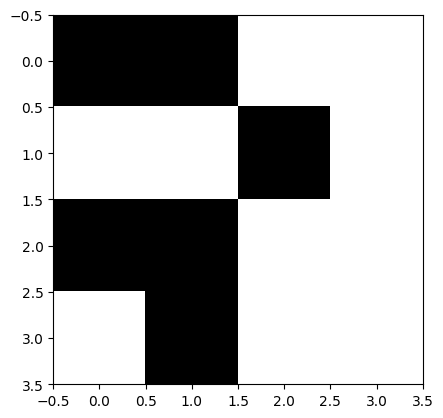

In [3]:
seq = seq.reshape(-1,*seq_dim)
couter = Counter(seq.reshape(-1))
print(couter)
seq[np.where(seq==0)] = -1
couter = Counter(seq.reshape(-1))
print(couter)
plt.imshow(seq[0], cmap='Greys', vmin=-1, vmax=1)

In [4]:
logits = np.load(os.path.join(work_dir, "logits_val_step0.npy"))
print(logits.shape)


(8192, 4, 4, 2)


In [5]:
import glob
f_logits_t = sorted(glob.glob(os.path.join(work_dir, "logits_val_step0_inttime*")))
time = [float(x.replace(os.path.join(work_dir, "logits_val_step0_inttime"), "").replace(".npy","")) for x in f_logits_t]
logits_t = [np.load(f) for f in f_logits_t]
print(time)

[1.0, 1.3684210777282715, 1.736842155456543, 2.1052632331848145, 2.473684310913086, 2.8421051502227783, 3.21052622795105, 3.5789473056793213, 3.9473683834075928, 4.315789222717285, 4.684210777282715, 5.052631378173828, 5.4210524559021, 5.789473533630371, 6.157894611358643, 6.526315689086914, 6.8947367668151855, 7.263157844543457, 7.6315789222717285, 8.0]


In [6]:

# print(np.sum(logits-logits_t[-1]))
print([logits_t[i].shape for i in range(len(logits_t))])

[(8192, 4, 4, 2), (8192, 4, 4, 2), (8192, 4, 4, 2), (8192, 4, 4, 2), (8192, 4, 4, 2), (8192, 4, 4, 2), (8192, 4, 4, 2), (8192, 4, 4, 2), (8192, 4, 4, 2), (8192, 4, 4, 2), (8192, 4, 4, 2), (8192, 4, 4, 2), (8192, 4, 4, 2), (8192, 4, 4, 2), (8192, 4, 4, 2), (8192, 4, 4, 2), (8192, 4, 4, 2), (8192, 4, 4, 2), (8192, 4, 4, 2), (8192, 4, 4, 2)]


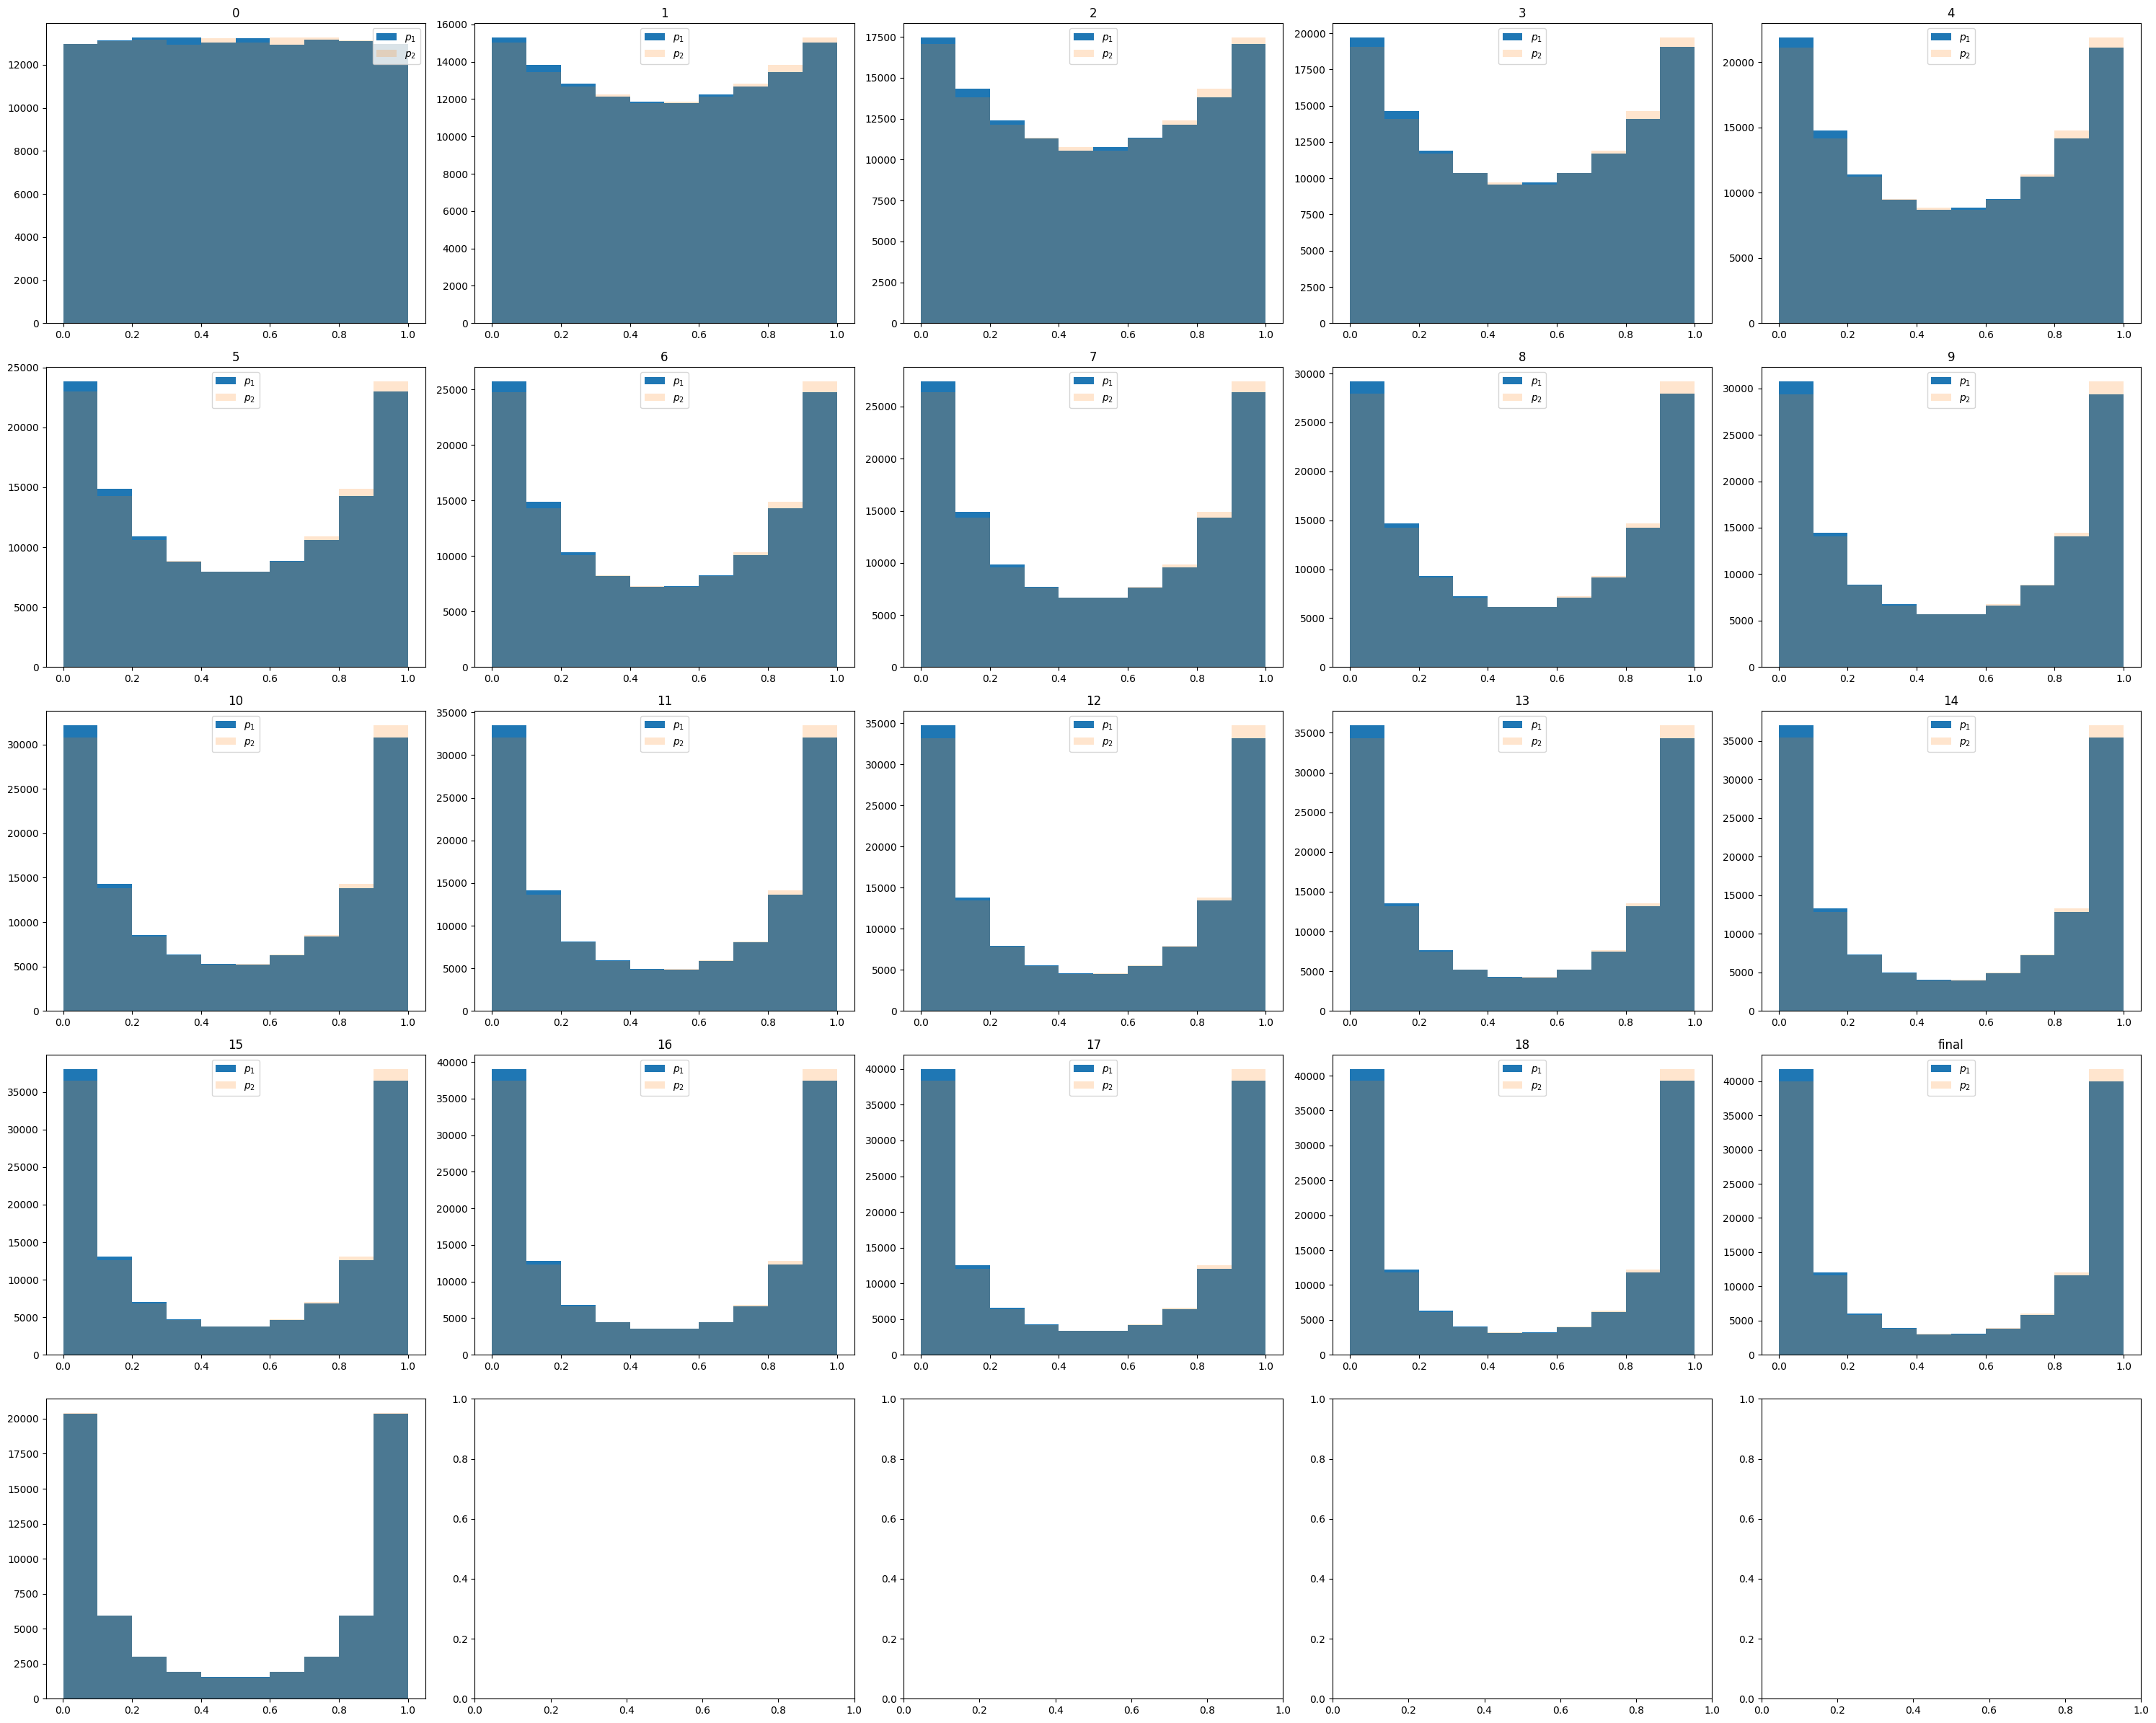

In [7]:
fig, axes = plt.subplots(ncols=5, nrows=5, figsize=(30, 24))

for ii in range(len(f_logits_t)):
    ii_y = ii%5
    ii_x = ii//5
    axes[ii_x][ii_y].hist(logits_t[ii][:,:,:,0].reshape(-1),label="$p_1$")
    axes[ii_x][ii_y].hist(logits_t[ii][:,:,:,1].reshape(-1), alpha=0.2, label="$p_2$")
    # seq_1 = np.argmax(logits_t[ii], axis=1)
    # axes[ii_x][ii_y].hist(seq_1.reshape(-1),label="$p_1$")
    axes[ii_x][ii_y].set_title(str(ii))
    axes[ii_x][ii_y].legend()
# plt.imshow(seq[0], cmap='Greys', vmin=-1, vmax=1)
axes[4][0].hist(logits_t[ii][:,0,:,:].reshape(-1))
axes[4][0].hist(logits_t[ii][:,1,:,:].reshape(-1), alpha=0.2)
axes[ii_x][ii_y].set_title("final")
fig.tight_layout()

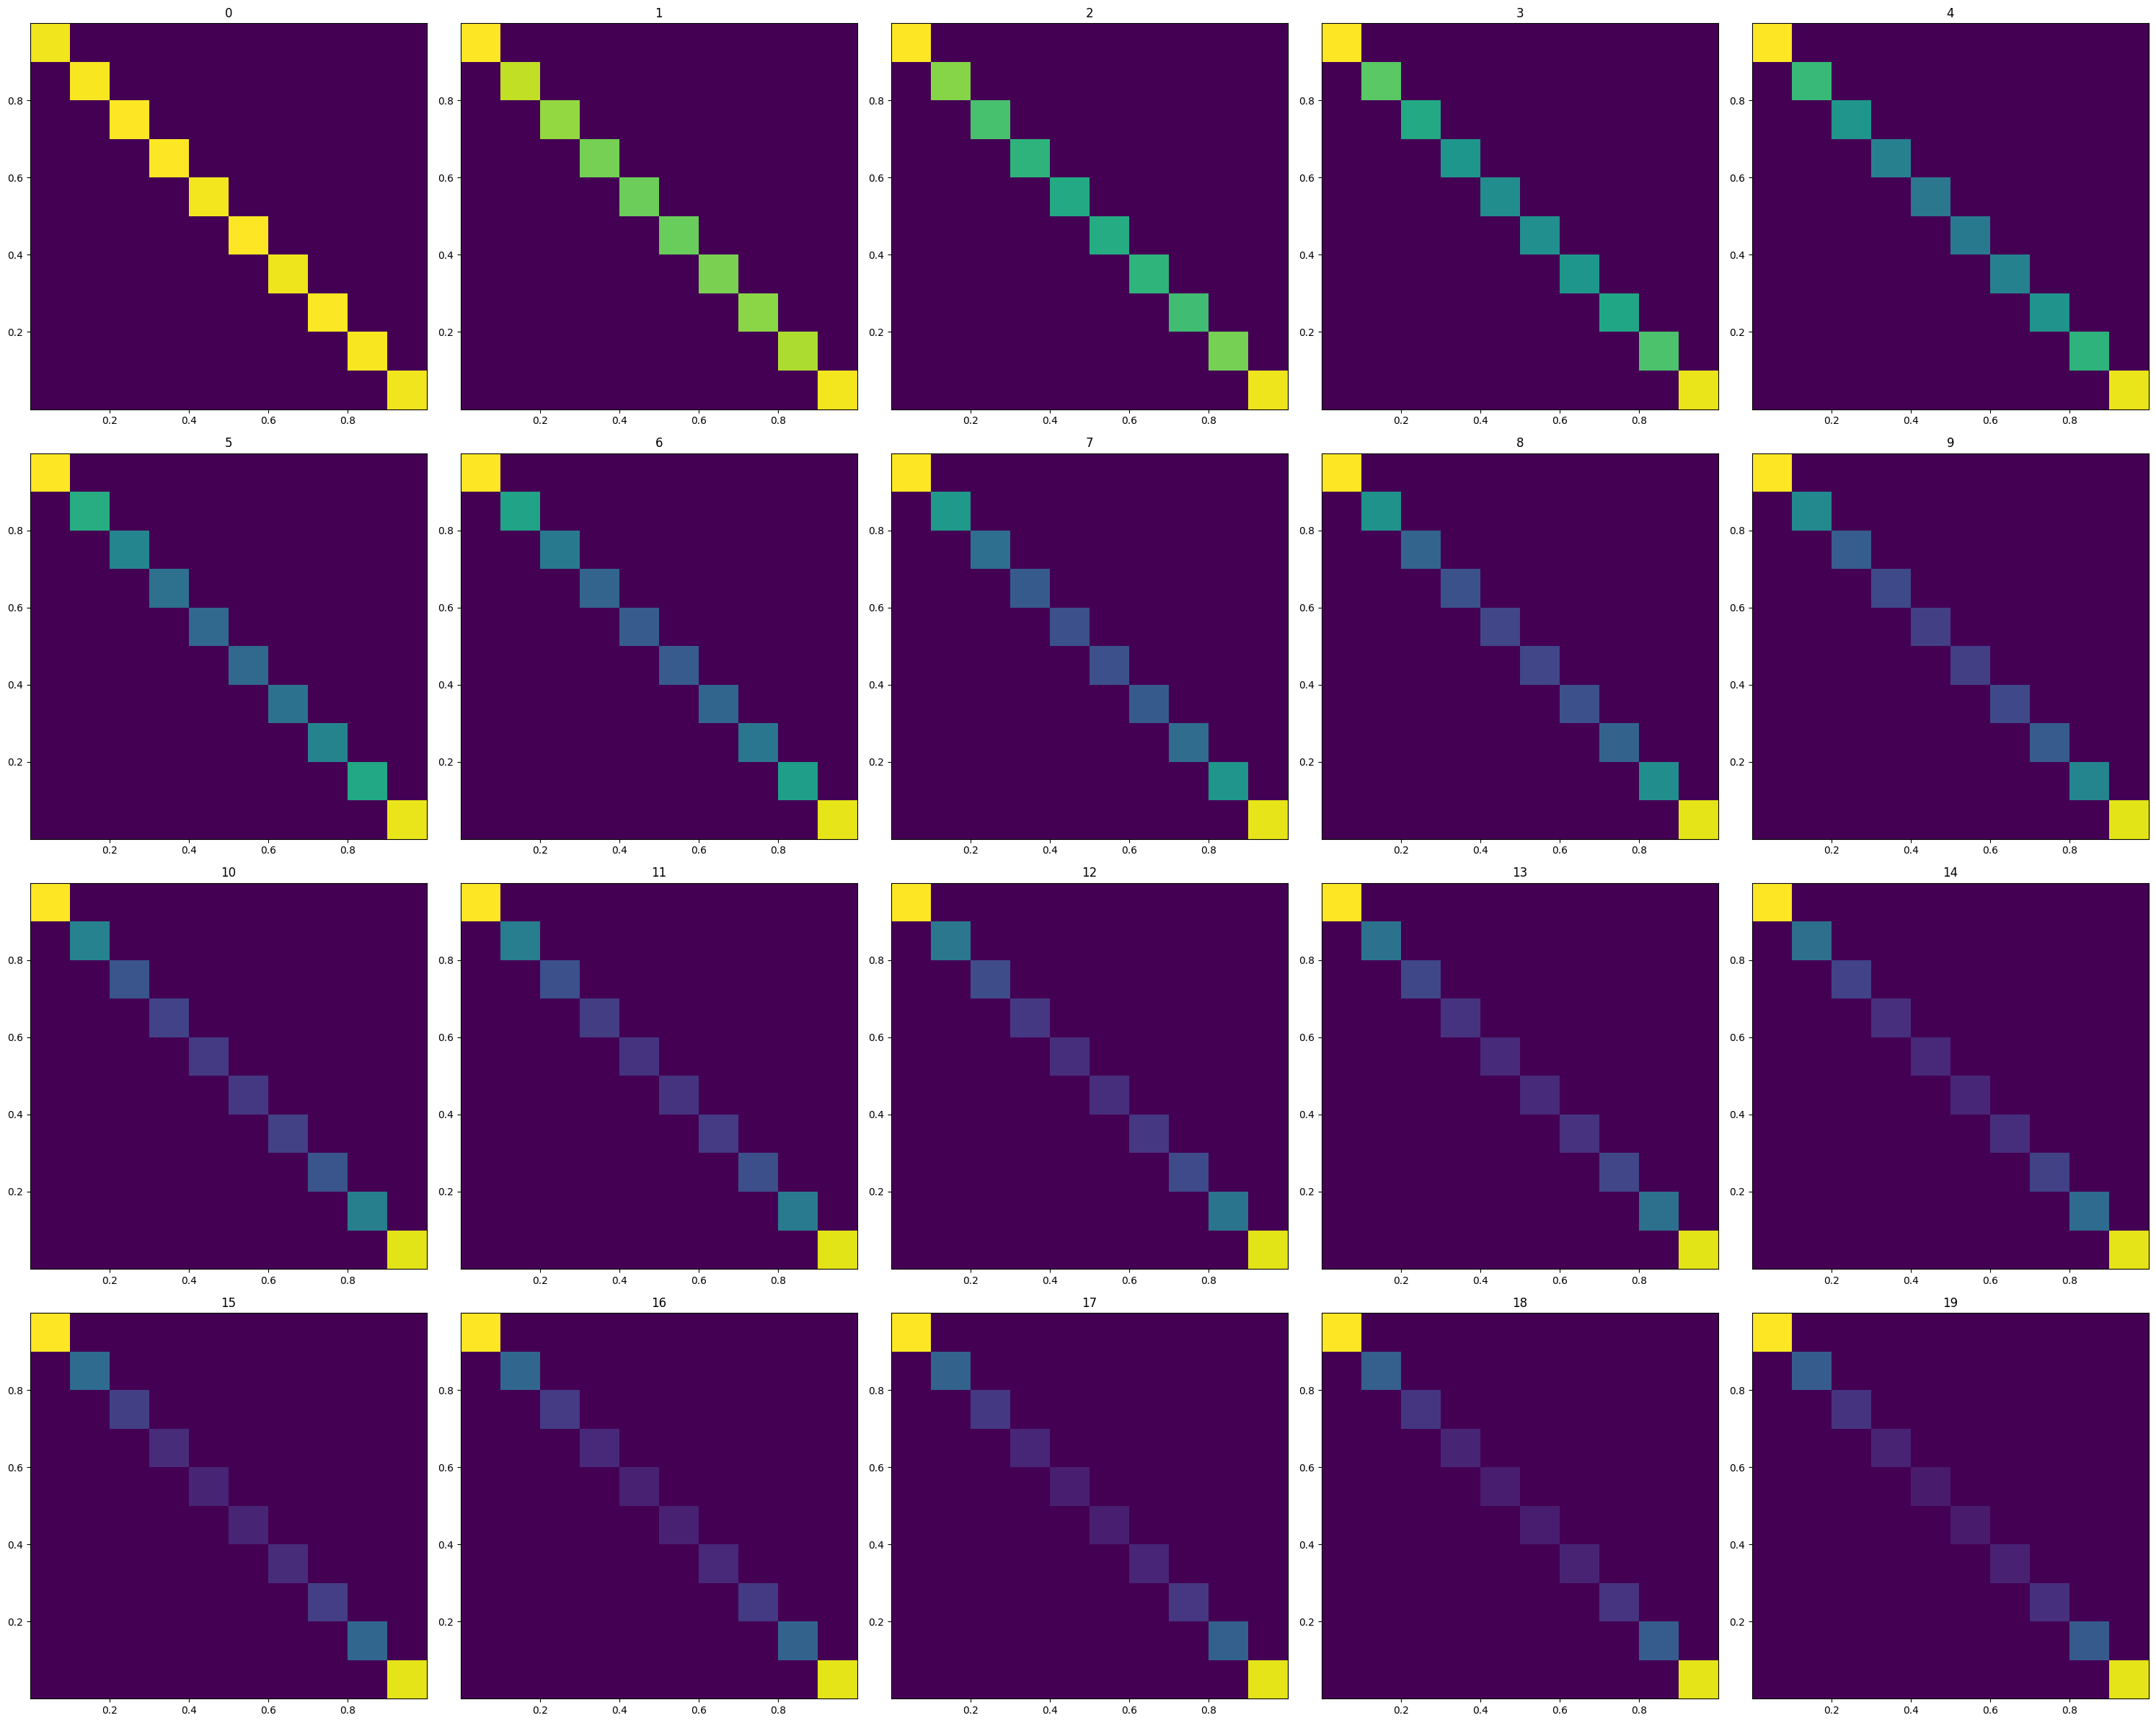

In [8]:
fig, axes = plt.subplots(ncols=5, nrows=4, figsize=(30, 24))

for ii in range(len(f_logits_t)):
    ii_y = ii%5
    ii_x = ii//5
    axes[ii_x][ii_y].hist2d(logits_t[ii][:,:,:,0].reshape(-1), logits_t[ii][:,:,:,1].reshape(-1))
    axes[ii_x][ii_y].set_title(str(ii))
# plt.imshow(seq[0], cmap='Greys', vmin=-1, vmax=1)
fig.tight_layout()

In [9]:

magn = np.arange(-np.prod(seq_dim), np.prod(seq_dim)+1, 2)
print(magn.reshape(-1))
seq = seq.reshape(-1,np.prod(seq_dim))
data = np.sum(seq, axis=-1)
counter = Counter(data)
print(counter.keys())
print(counter.values())

seq_1 = np.argmax(logits_t[-1], axis=-1)
print(seq_1.shape)
seq_1[np.where(seq_1==0)] = -1
seq_1 = seq_1.reshape(-1,np.prod(seq_dim))
data_1 = np.sum(seq_1, axis=-1)
counter_1 = Counter(data_1)
print(counter_1.keys())
print(counter_1.values())

hist = np.array([counter[m] for m in magn[:]])
print(hist)
P = hist/np.sum(hist)
free_energies = -np.log(P)*4

[-16 -14 -12 -10  -8  -6  -4  -2   0   2   4   6   8  10  12  14  16]
dict_keys([-4, 6, -8, -2, -6, -14, 2, 4, 12, 8, 0, 10, -10, -12, 14, 16, -16])
dict_values([711, 672, 518, 729, 597, 206, 705, 700, 365, 594, 767, 466, 468, 316, 233, 87, 58])
(8192, 4, 4)
dict_keys([-4, 6, -8, -2, -6, -14, 2, 4, 12, 8, 0, 10, -10, -12, 14, 16, -16])
dict_values([711, 672, 518, 729, 597, 206, 705, 700, 365, 594, 767, 466, 468, 316, 233, 87, 58])
[ 58 206 316 468 518 597 711 729 767 705 700 672 594 466 365 233  87]


/tmp/ipykernel_3501133/1678005252.py:18: RuntimeWarning: divide by zero encountered in log
  free_energies_1 = -np.log(P_1)*4


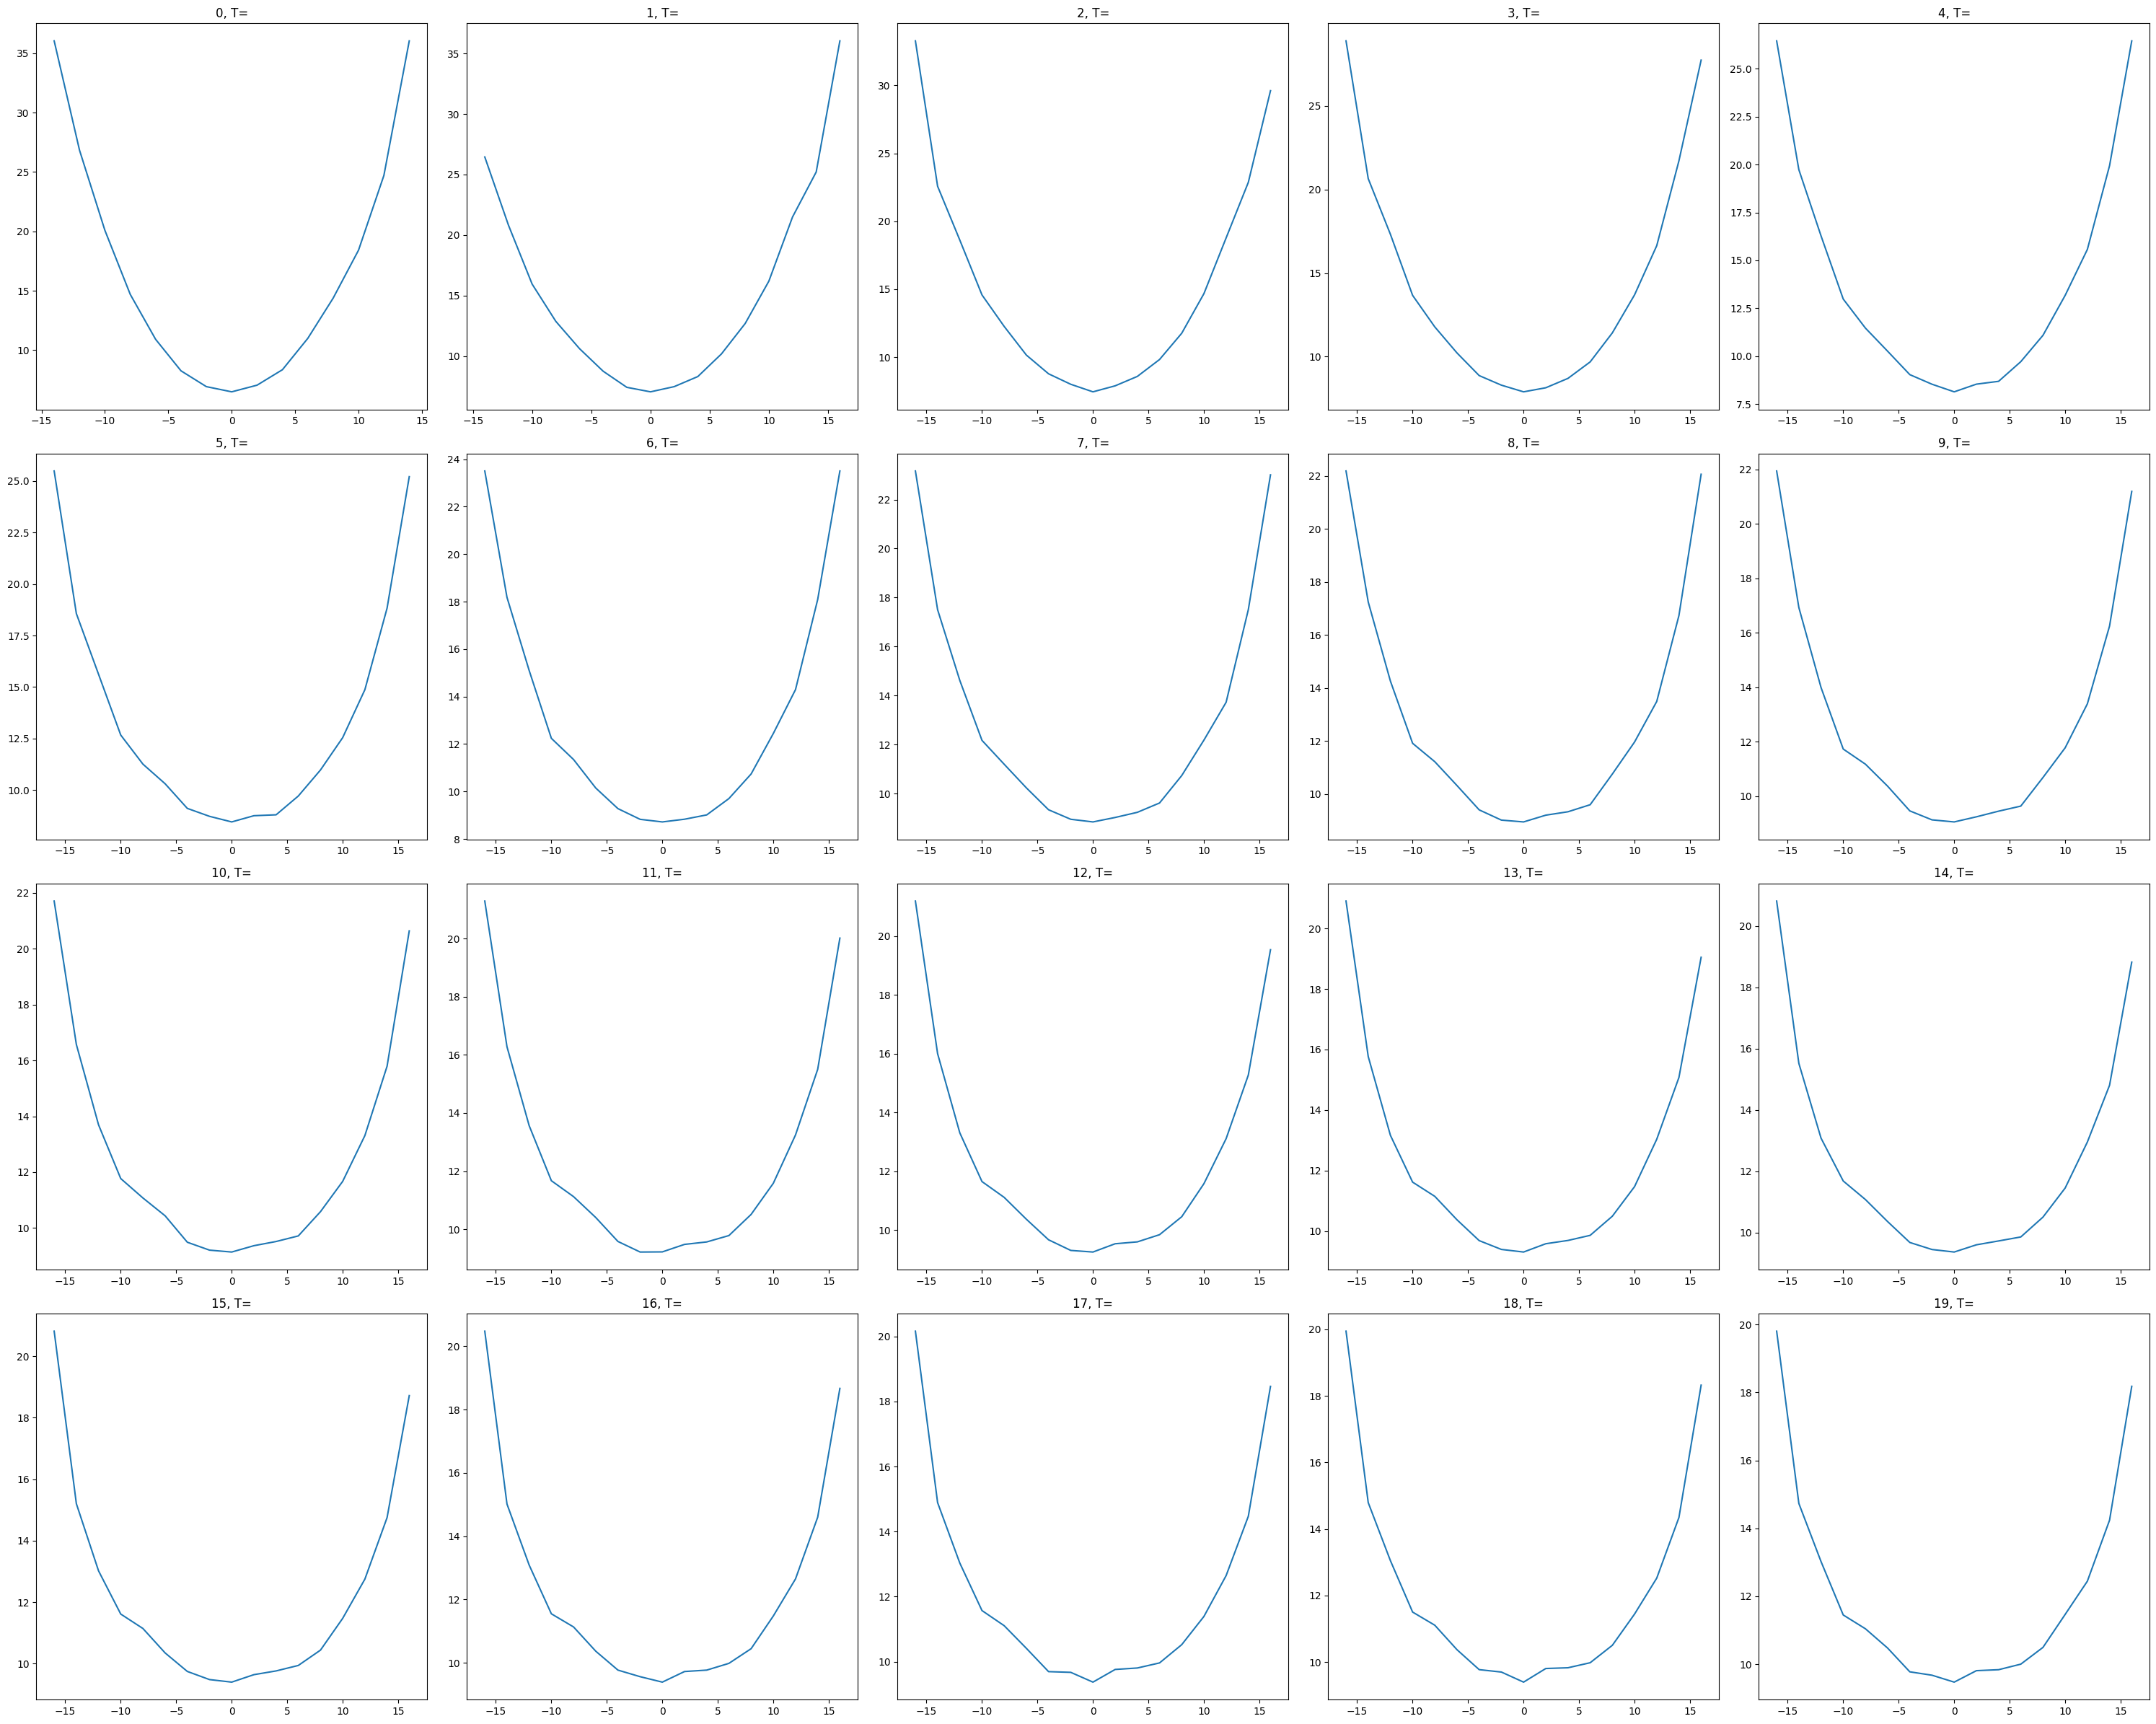

In [10]:
fig, axes = plt.subplots(ncols=5, nrows=4, figsize=(30, 24))

for ii in range(len(f_logits_t)):
    ii_y = ii%5
    ii_x = ii//5

    magn = np.arange(-np.prod(seq_dim), np.prod(seq_dim)+1, 2)
    seq_1 = np.argmax(logits_t[ii], axis=-1)

    seq_1[np.where(seq_1==0)] = -1
    seq_1 = seq_1.reshape(-1,np.prod(seq_dim))
    data_1 = np.sum(seq_1, axis=-1)
    counter_1 = Counter(data_1)

    hist_1 = np.array([counter_1[m] for m in magn[:]])

    P_1 = hist_1/np.sum(hist_1)
    free_energies_1 = -np.log(P_1)*4
    
        
    axes[ii_x][ii_y].plot(magn[:], free_energies_1)
    axes[ii_x][ii_y].set_title("%d, T="%(ii))
# plt.imshow(seq[0], cmap='Greys', vmin=-1, vmax=1)
fig.tight_layout()

/tmp/ipykernel_3501133/2915923082.py:17: RuntimeWarning: divide by zero encountered in log
  free_energies_1 = -np.log(P_1)
/tmp/ipykernel_3501133/2915923082.py:41: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(fes_ref[0], (fes_ref[1]-fes_ref[1][8])/4.0, label="Ref, $k_BT$=%.2f"%4, marker="x", c=line_color[-1])
/tmp/ipykernel_3501133/2915923082.py:43: RuntimeWarning: invalid value encountered in add
  free_energies_2 = (free_energies_1-f_t0)*4.0/jj + f_t0


Text(0, 0.5, 'FES ($k_BT$)')

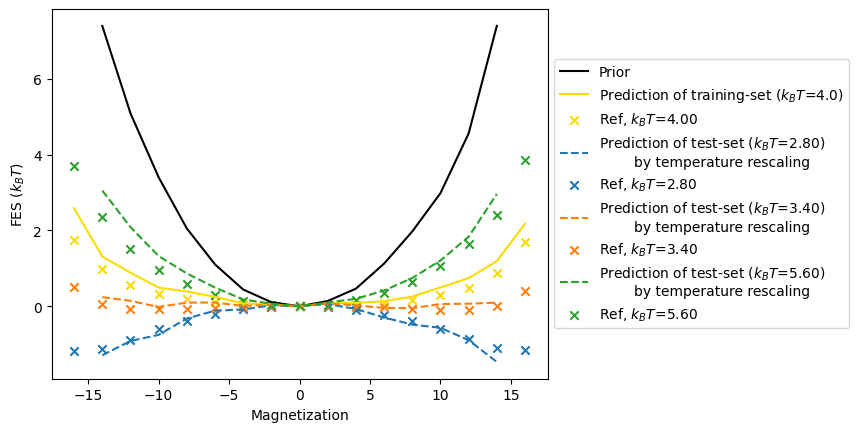

In [11]:

from matplotlib.pyplot import cm
line_color = [plt.colormaps["gnuplot"](float(i)/float(len(f_logits_t))) for i in range(len(f_logits_t))]

for ii in [0, len(f_logits_t)-1]:

    magn = np.arange(-np.prod(seq_dim), np.prod(seq_dim)+1, 2)
    seq_1 = np.argmax(logits_t[ii], axis=-1)

    seq_1[np.where(seq_1==0)] = -1
    seq_1 = seq_1.reshape(-1,np.prod(seq_dim))
    data_1 = np.sum(seq_1, axis=-1)
    
    counter_1 = Counter(data_1)
    hist_1 = np.array([counter_1[m] for m in magn[:]])

    P_1 = hist_1/np.sum(hist_1)
    free_energies_1 = -np.log(P_1)
    if ii == 0: f_t0 = free_energies_1
    if ii == 0:
        label="Prior"
    elif ii == len(f_logits_t)-1:
        label="Prediction of training-set ($k_BT$=4.0)"
    plt.plot(magn[:], free_energies_1-free_energies_1[8], c=line_color[ii], label=label)

# plt.plot(magn[:], f_t0-f_t0[8], linestyle="--", label="rescale T=Inf")
for ii in [len(f_logits_t)-1]:
    magn = np.arange(-np.prod(seq_dim), np.prod(seq_dim)+1, 2)
    seq_1 = np.argmax(logits_t[ii], axis=-1)

    seq_1[np.where(seq_1==0)] = -1
    seq_1 = seq_1.reshape(-1,np.prod(seq_dim))
    data_1 = np.sum(seq_1, axis=-1)
    counter_1 = Counter(data_1)

    hist_1 = np.array([counter_1[m] for m in magn[:]])

    P_1 = hist_1/np.sum(hist_1)
    free_energies_1 = -np.log(P_1)
    # plt.plot(magn[:], free_energies_1-free_energies_1[8], linestyle="--", label="$k_BT$=%.2f"%4.0)
    fes_ref = np.loadtxt("../../../../../data/ising-latt4x4-T4.0/latt4x4/FES%.2f.dat"%(4)).T
    plt.scatter(fes_ref[0], (fes_ref[1]-fes_ref[1][8])/4.0, label="Ref, $k_BT$=%.2f"%4, marker="x", c=line_color[-1])
    for jj in [2.8, 3.4, 5.6]:
        free_energies_2 = (free_energies_1-f_t0)*4.0/jj + f_t0
        plt.plot(magn[:], free_energies_2-free_energies_2[8], linestyle="--", label="Prediction of test-set ($k_BT$=%.2f)\n        by temperature rescaling"%jj)
        fes_ref = np.loadtxt("../../../../../data/ising-latt4x4-T4.0/latt4x4/FES%.2f.dat"%(jj)).T
        plt.scatter(fes_ref[0], (fes_ref[1]-fes_ref[1][8])/jj, label="Ref, $k_BT$=%.2f"%jj, marker="x")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Magnetization")
plt.ylabel("FES ($k_BT$)")


In [12]:

def pbc(i,L=4):
    assert i>=-1 and i<=L
    if i-L == 0:
        return 0
    elif i == -1:
        return L-1
    else:
        return i
    
from copy import deepcopy
def ising_boltzman_prob_nn(seq, J=1, kBT=4.0):
    shape = seq.shape
    # spins = seq.clone().detach()
    spins = deepcopy(seq)
    spins[np.where(spins==0)]=-1
    B,H,W = shape
    E = np.zeros(B)
    for i in range(H):
        for j in range(W):
            E += -spins[:,i,j]*spins[:,pbc(i-1),j]*J
            E += -spins[:,i,j]*spins[:,pbc(i+1),j]*J
            E += -spins[:,i,j]*spins[:,i,pbc(j-1)]*J
            E += -spins[:,i,j]*spins[:,i,pbc(j+1)]*J

    E /= 2
    prob = np.exp(-E/kBT)
    return prob, E/kBT

def ising_boltzman_prob_2nn(seq, J=1, J2=0.7, kBT=4.0):
    shape = seq.shape
    # spins = seq.clone().detach()
    spins = deepcopy(seq)
    spins[np.where(spins==0)]=-1
    B,H,W = shape
    E = np.zeros(B)
    for i in range(H):
        for j in range(W):
            E += -spins[:,i,j]*spins[:,pbc(i-1),j]*J
            E += -spins[:,i,j]*spins[:,pbc(i+1),j]*J
            E += -spins[:,i,j]*spins[:,i,pbc(j-1)]*J
            E += -spins[:,i,j]*spins[:,i,pbc(j+1)]*J

            E += -spins[:,i,j]*spins[:,pbc(i-1),pbc(j-1)]*J2
            E += -spins[:,i,j]*spins[:,pbc(i+1),pbc(j-1)]*J2
            E += -spins[:,i,j]*spins[:,pbc(i-1),pbc(j+1)]*J2
            E += -spins[:,i,j]*spins[:,pbc(i+1),pbc(j+1)]*J2


    E /= 2
    prob = np.exp(-E/kBT)
    return prob, E/kBT


/tmp/ipykernel_3501133/1503264054.py:17: RuntimeWarning: divide by zero encountered in log
  free_energies_1 = -np.log(P_1)
/tmp/ipykernel_3501133/1503264054.py:43: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axes[0].scatter(fes_ref[0], (fes_ref[1]-fes_ref[1][8])/4.0, label="Ref($J_1=1$), $k_BT$=%.2f"%4, marker="s", c=line_color[-1])
/tmp/ipykernel_3501133/1503264054.py:46: RuntimeWarning: invalid value encountered in add
  free_energies_2 = (free_energies_1-f_t0)*4.0/jj + f_t0
/tmp/ipykernel_3501133/1503264054.py:60: RuntimeWarning: invalid value encountered in add
  free_energies_2 = (free_energies_1_rew-f_t0)*4.0/jj + f_t0


Approximate N_eff/N_all = 7219.28489695 / 8192 @ k_BT=4.00 
Approximate N_eff/N_all = 7219.28489695 / 8192 @ k_BT=3.20 
Approximate N_eff/N_all = 7219.28489695 / 8192 @ k_BT=3.60 
Approximate N_eff/N_all = 7219.28489695 / 8192 @ k_BT=5.60 


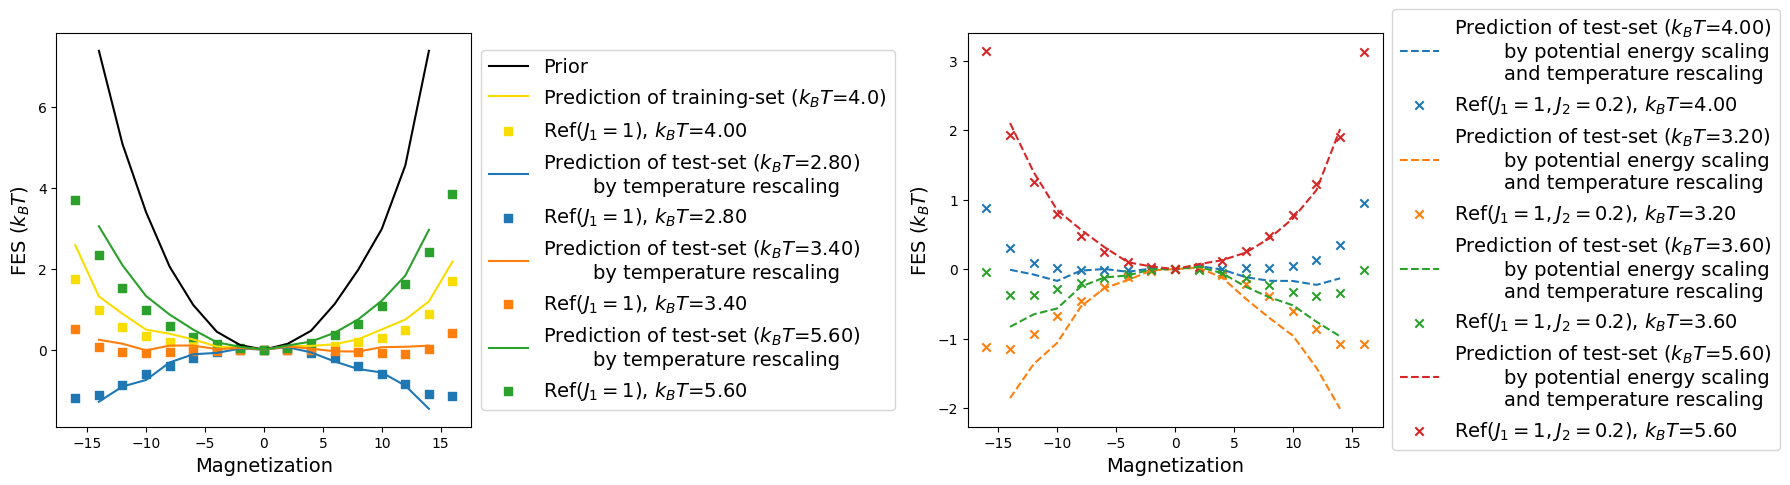

In [14]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(18, 5))

for ii in [0, len(f_logits_t)-1]:

    magn = np.arange(-np.prod(seq_dim), np.prod(seq_dim)+1, 2)
    seq_1 = np.argmax(logits_t[ii], axis=-1)

    seq_1[np.where(seq_1==0)] = -1
    seq_1 = seq_1.reshape(-1,np.prod(seq_dim))
    data_1 = np.sum(seq_1, axis=-1)
    
    # counter_1 = Counter(data_1)
    # hist_1 = np.array([counter_1[m] for m in magn[:]])
    hist_1, bin_edges = np.histogram(data_1, bins=np.linspace(magn[0]-1, magn[-1]+1, 17+1))

    P_1 = hist_1/np.sum(hist_1)
    free_energies_1 = -np.log(P_1)
    if ii == 0: f_t0 = free_energies_1
    if ii == 0:
        label="Prior"
    elif ii == len(f_logits_t)-1:
        label="Prediction of training-set ($k_BT$=4.0)"
    axes[0].plot(magn[:], free_energies_1-free_energies_1[8], c=line_color[ii], label=label)

# plt.plot(magn[:], f_t0-f_t0[8], linestyle="--", label="rescale T=Inf")
for ii in [len(f_logits_t)-1]:
    magn = np.arange(-np.prod(seq_dim), np.prod(seq_dim)+1, 2)
    seq_1 = np.argmax(logits_t[ii], axis=-1)

    seq_1[np.where(seq_1==0)] = -1
    seq_1 = seq_1.reshape(-1,np.prod(seq_dim))
    data_1 = np.sum(seq_1, axis=-1)

    Pconf_1nn, E_1nn = ising_boltzman_prob_nn(seq_1.reshape(-1,*seq_dim))
    
    # counter_1 = Counter(data_1)
    # hist_1 = np.array([counter_1[m] for m in magn[:]])
    hist_1, bin_edges = np.histogram(data_1, bins=np.linspace(magn[0]-1, magn[-1]+1, 17+1))

    P_1 = hist_1/np.sum(hist_1)
    free_energies_1 = -np.log(P_1)
    fes_ref = np.loadtxt("../../../../../data/ising-latt4x4-T4.0/latt4x4/FES%.2f.dat"%(4)).T
    axes[0].scatter(fes_ref[0], (fes_ref[1]-fes_ref[1][8])/4.0, label="Ref($J_1=1$), $k_BT$=%.2f"%4, marker="s", c=line_color[-1])

    for jj in [2.8, 3.4, 5.6]:
        free_energies_2 = (free_energies_1-f_t0)*4.0/jj + f_t0
        axes[0].plot(magn[:], free_energies_2-free_energies_2[8], label="Prediction of test-set ($k_BT$=%.2f)\n        by temperature rescaling"%jj)
        fes_ref = np.loadtxt("../../../../../data/ising-latt4x4-T4.0/latt4x4/FES%.2f.dat"%(jj)).T
        axes[0].scatter(fes_ref[0], (fes_ref[1]-fes_ref[1][8])/jj, label="Ref($J_1=1$), $k_BT$=%.2f"%jj, marker="s")

    for jj in [4.0, 3.2, 3.6, 5.6]:
        # Reweight at k_BT = 4.0
        Pconf_2nn, E_2nn = ising_boltzman_prob_2nn(seq_1.reshape(-1,*seq_dim), J2=0.2, kBT=4.0)
        weights = Pconf_2nn/Pconf_1nn
        weights = weights/np.sum(weights)
        hist_1_rew, bin_edges = np.histogram(data_1, bins=np.linspace(magn[0]-1, magn[-1]+1, 17+1), weights = weights)
        P_1_rew = hist_1_rew/np.sum(hist_1_rew)
        free_energies_1_rew = -np.log(P_1_rew)
        # Rescale to other temperatures
        free_energies_2 = (free_energies_1_rew-f_t0)*4.0/jj + f_t0
        axes[1].plot(magn[:], free_energies_2-free_energies_2[8], linestyle="--", label="Prediction of test-set ($k_BT$=%.2f)\n        by potential energy scaling\n        and temperature rescaling"%jj)
        fes_ref = np.loadtxt("../../../../../data/ising-latt4x4-T4.0/latt4x4/bond2nn0.2/FES2nn%.2f.dat"%(jj)).T
        axes[1].scatter(fes_ref[0], (fes_ref[1]-fes_ref[1][8])/jj, label="Ref($J_1=1, J_2=0.2$), $k_BT$=%.2f"%jj, marker="x")
        print("Approximate N_eff/N_all = %.8f / %d @ k_BT=%.2f "%(np.exp(-(weights*np.log(weights)).sum()), len(weights), jj))
axes[0].legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
axes[1].legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
axes[0].set_xlabel("Magnetization", fontdict={"size":14})
axes[0].set_ylabel("FES ($k_BT$)", fontdict={"size":14})
axes[1].set_xlabel("Magnetization", fontdict={"size":14})
axes[1].set_ylabel("FES ($k_BT$)", fontdict={"size":14})
fig.tight_layout()



[ 58 206 316 468 518 597 711 729 767 705 700 672 594 466 365 233  87]


(-16.0, 16.0)

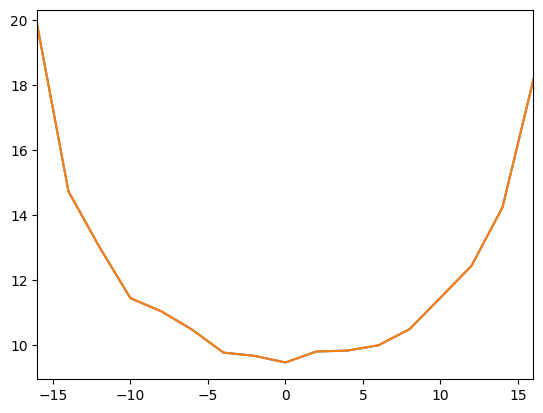

In [ ]:


hist_1 = np.array([counter_1[m] for m in magn[:]])
print(hist_1)
P_1 = hist_1/np.sum(hist_1)
free_energies_1 = -np.log(P_1)*4

# plt.figure()
# plt.plot(magn[:], free_energies)
# plt.plot(magn[:], free_energies_1)
# plt.xlim((-16,16))

plt.figure()
plt.plot(magn[:], free_energies)
plt.plot(magn[:], free_energies_1)
plt.xlim((-16,16))

In [ ]:
import torch
def RC_(seq):
    assert len(seq.shape) == 2
    return torch.sum(seq, dim=-1).reshape(-1,1)

def RC(logits):
    assert logits.shape[-1] == 2
    B = logits.shape[0]
    RC = torch.sum(logits*torch.tensor([-1,1])[None,None,None,:], dim=-1)
    RC = torch.sum(RC.reshape(B, -1), dim=-1)
    return RC.reshape(-1,1)

class UmbrellaSampling():
    def __init__(self, RC):
        self.RC = RC
    
    def buffer2rc_trajs(self, x):
        self.rc_trajs = self.RC(x)

    def mbar(self, rc_min=None, rc_max=None, rc_bins=31, return_fes=False):
        """ Estimates free energy along reaction coordinate with binless WHAM / MBAR.

        Parameters
        ----------
        rc_min : float or None
            Minimum bin position. If None, the minimum RC value will be used.
        rc_max : float or None
            Maximum bin position. If None, the maximum RC value will be used.
        rc_bins : int or None
            Number of bins

        Returns
        -------
        bins : array
            Bin positions
        F : array
            Free energy / -log(p) for all bins

        """
        if rc_min is None:
            rc_min = np.concatenate(self.rc_trajs).min()
        if rc_max is None:
            rc_max = np.concatenate(self.rc_trajs).max()
        gmeans = torch.tensor(np.linspace(rc_min, rc_max, rc_bins))
        gstd = (rc_max - rc_min) / rc_bins
        # self.kmat = torch.exp(-(self.rc_trajs - gmeans)*(self.rc_trajs - gmeans) / (2 * gstd * gstd))
        kmat = torch.exp(-(self.rc_trajs - gmeans)*(self.rc_trajs - gmeans) / (2 * gstd * gstd))/ (torch.exp(-(self.rc_trajs - gmeans)*(self.rc_trajs - gmeans) / (2 * gstd * gstd))).sum(axis=1).reshape(-1,1)
        kmat += 1e-6
        h_ = kmat.mean(axis=0).requires_grad_(True) 
        print(h_)
        # h_ = h_/h_.sum() 
        print("sum(h_) = ", sum(h_))
        # del norm_kmat
        FES = -torch.log(h_)
        print("gmeans = ", gmeans)
        print("FES (kBT) = ", FES)
        F = torch.sum(FES)
        # del FES
        print("F_RC = ", F)
        if return_fes:
            return F, gmeans, FES, h_
        else:
            return F

US = UmbrellaSampling(RC)

In [ ]:
logits_ = torch.from_numpy(logits_t[-1])
norm_logits_ = torch.nn.functional.softmax(logits_, dim=-1)
US.buffer2rc_trajs(norm_logits_)

F, gmeans, FES, hist = US.mbar(rc_min=-16, rc_max=16, rc_bins=17, return_fes=True)

tensor([1.0076e-06, 2.1570e-06, 6.5177e-05, 1.3788e-03, 1.2425e-02, 5.2727e-02,
        1.2300e-01, 1.8832e-01, 2.1646e-01, 1.9659e-01, 1.3384e-01, 5.9170e-02,
        1.4323e-02, 1.6341e-03, 7.9414e-05, 2.4671e-06, 1.0101e-06],
       dtype=torch.float64, requires_grad=True)
sum(h_) =  tensor(1.0000, dtype=torch.float64, grad_fn=<AddBackward0>)
gmeans =  tensor([-16., -14., -12., -10.,  -8.,  -6.,  -4.,  -2.,   0.,   2.,   4.,   6.,
          8.,  10.,  12.,  14.,  16.], dtype=torch.float64)
FES (kBT) =  tensor([13.8079, 13.0468,  9.6384,  6.5865,  4.3881,  2.9426,  2.0956,  1.6696,
         1.5303,  1.6267,  2.0111,  2.8273,  4.2459,  6.4167,  9.4408, 12.9125,
        13.8054], dtype=torch.float64, grad_fn=<NegBackward0>)
F_RC =  tensor(108.9923, dtype=torch.float64, grad_fn=<SumBackward0>)


[[-16.     -14.     -12.     -10.      -8.      -6.      -4.      -2.
    0.       2.       4.       6.       8.      10.      12.      14.
   16.    ]
 [ 16.9458  13.8868  12.2251  11.3112  10.7552  10.4042  10.1792  10.047
    9.9818  10.0504  10.1651  10.373   10.6944  11.1748  11.9635  13.527
   16.7959]]


Text(0, 0.5, 'FES (J)')

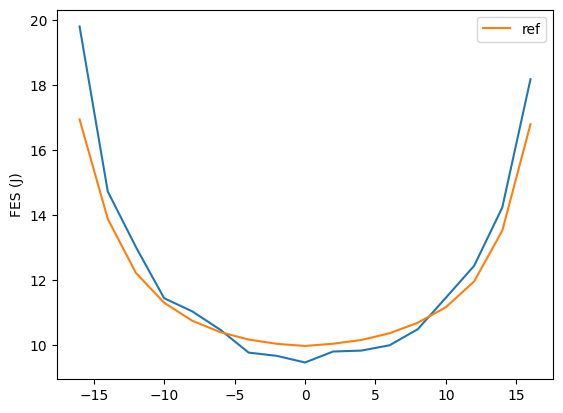

In [ ]:
plt.plot(magn[:], free_energies_1)
fes_ref = np.loadtxt("../../../../../data/ising-latt4x4-T4.0/latt4x4/FES4.00.dat").T
print(fes_ref)
plt.plot(fes_ref[0], fes_ref[1], label="ref")
plt.legend()
plt.ylabel("FES (J)")

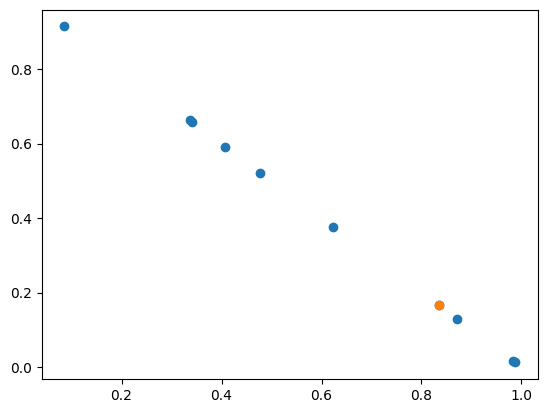

In [ ]:
alphas_ = torch.ones(10, 1, 2)
alphas_[1,0,0] += 5
dist = torch.distributions.Dirichlet(alphas_).sample()
# print(dist)
plt.scatter(dist[:,:,0], dist[:,:,1])
plt.scatter(dist[1,:,0], dist[1,:,1])

In [ ]:
print(4096*4)


16384
